# 1. Project Background

# 2. Load Data & Libraries

In [1]:
#import necessary
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import data
import os
data_dir='/content/drive/My Drive/tomato_diseases'

In [4]:
train=tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                            labels='inferred',
                                                            batch_size=32,
                                                            image_size=(256,256),
                                                            shuffle=True,
                                                            seed=42,
                                                            validation_split=0.2,
                                                            subset='training')

validation=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                            labels='inferred',
                                                            batch_size=32,
                                                            image_size=(256,256),
                                                            shuffle=True,
                                                            seed=42,
                                                            validation_split=0.2,
                                                            subset='validation')

Found 4743 files belonging to 3 classes.
Using 3795 files for training.
Found 4743 files belonging to 3 classes.
Using 948 files for validation.


In [5]:
#print the classes
class_names=train.class_names
for x in class_names:
     print(x)

Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy


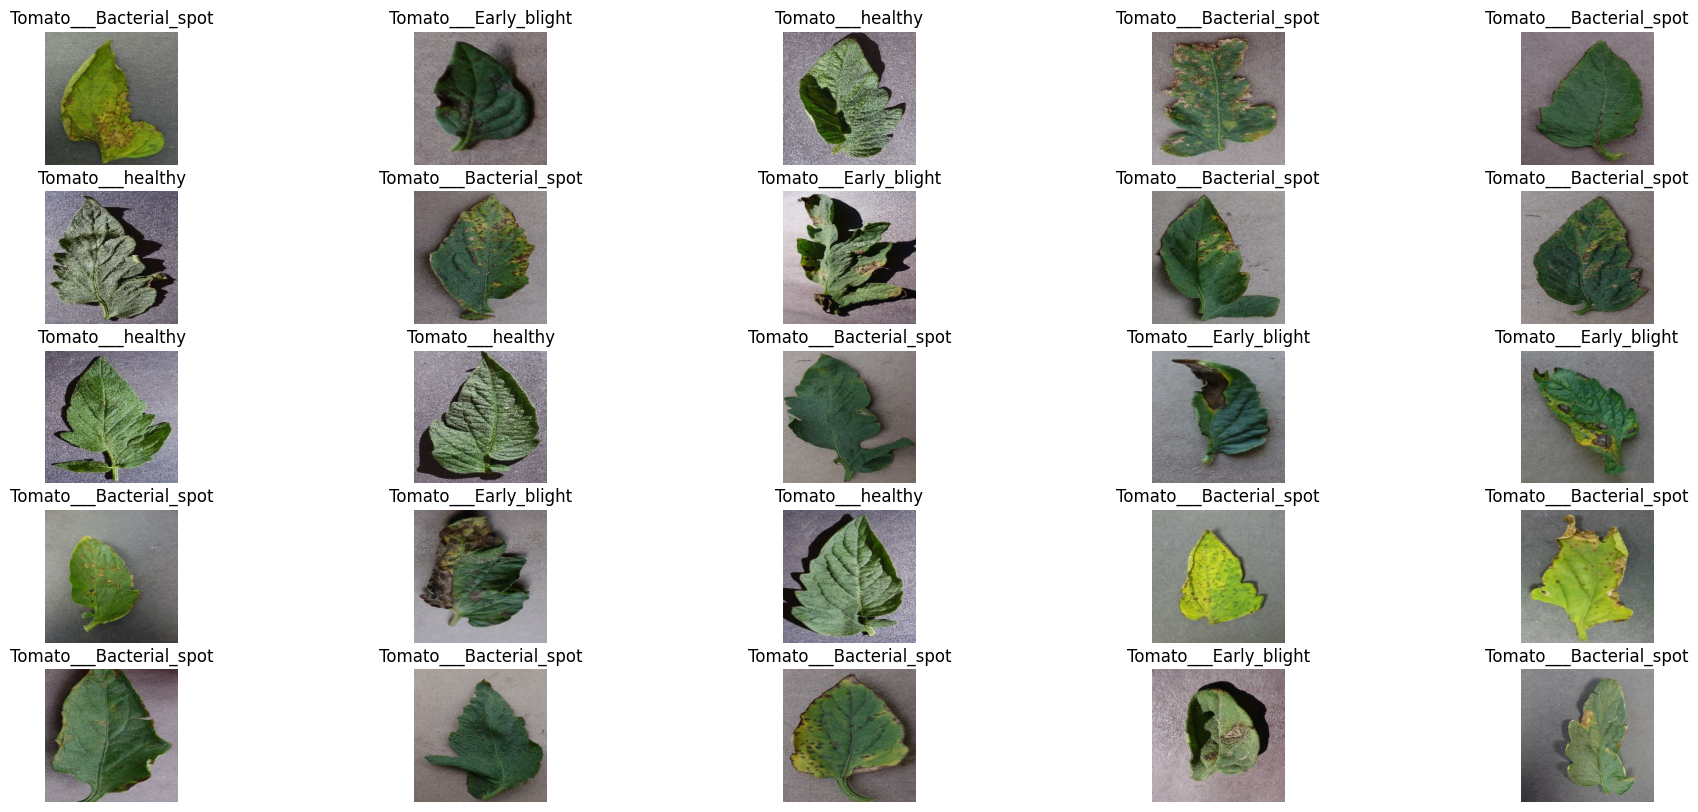

In [6]:
plt.figure(figsize=(23, 10))

for images, labels in train.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
#How many images are there in each class?
class_names=train.class_names
#initialize a counter
count={}
for x in class_names:
     count[x]=0
     for images, labels in train:
          for label in labels:
               if class_names[label]==x:
                    count[x]+=1


for x in class_names:
     print(x,count[x])



Tomato___Bacterial_spot 1717
Tomato___Early_blight 781
Tomato___healthy 1297


#4. Building the netwrok

In [8]:
# Create the CNN model - same as Tiny VGG
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3, # Can also be given as (3,3)
                           activation = 'relu',
                           input_shape = (256, 256, 3)), # the first layer specifies input shape
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'same'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # this is a binary activation output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#5. Compiling & Fitting the model

In [9]:
# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [10]:
epochs=10
history = model_1.fit(
train,
validation_data=validation,
epochs=epochs
)


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.2083 - loss: -256442.5469 - val_accuracy: 0.2310 - val_loss: -10577682.0000
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.2055 - loss: -54675564.0000 - val_accuracy: 0.2310 - val_loss: -537103040.0000
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.2009 - loss: -1490936448.0000 - val_accuracy: 0.2310 - val_loss: -8151870976.0000
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.2056 - loss: -14736814080.0000 - val_accuracy: 0.2310 - val_loss: -47006961664.0000
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.2046 - loss: -77216038912.0000 - val_accuracy: 0.2310 - val_loss: -196359077888.0000
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.2072 - loss: -277895708672.0000 - val_accuracy: 0.2310 - val_loss: -586971414528.0000
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.2076 - loss: -772911726592.

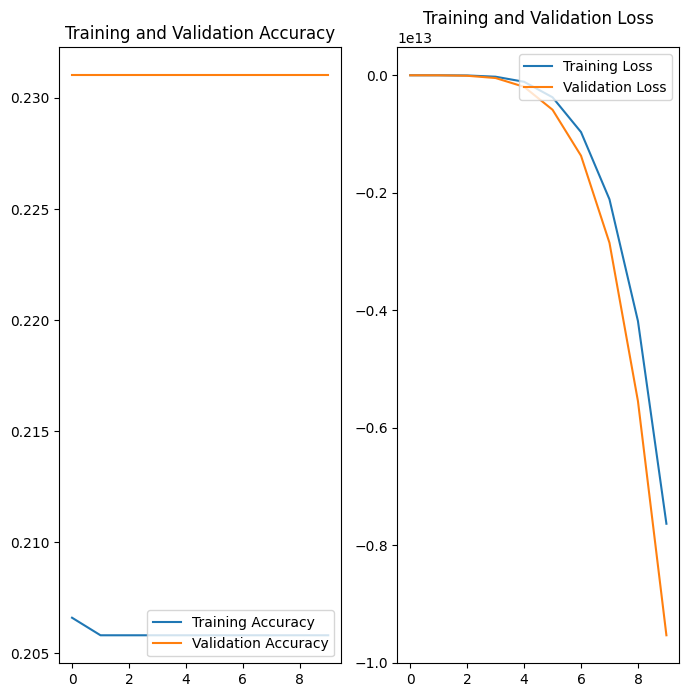

In [11]:
#Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs
epochs_range = range(epochs)

#Plotting graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
